### Decision Tree

Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks.

A Decision Tree can also estimate the probability that an instance belongs to a particular class k. 

To **avoid overfitting**, we could:
- max_depth: regularize the model and thus reduce the risk of overfitting
- min_samples_split (the minimum number of samples a node must have before it can be split)
- min_samples_leaf (the minimum number of samples a leaf node must have)
- min_weight_fraction_leaf (same as min_samples_leaf but expressed as a fraction of the total number of weighted instances)
- max_leaf_nodes (the maximum number of leaf nodes)
- max_features (the maximum number of features that are evaluated for splitting at each node)

**Limitation - Instability**
- Decision Trees are very sensitive to small variations in the training data.
- Decision Trees love orthogonal decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to training set rotation.

**Solution** to Decision Trees' Limitation? - Random Forests


In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [2]:
from sklearn.tree import export_graphviz

In [3]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True)

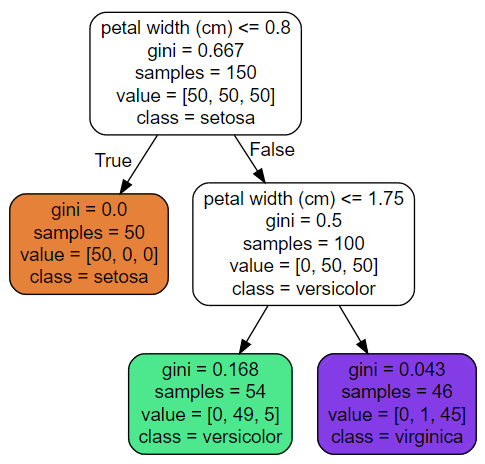

### Estimating Class Probabilities

In [4]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [5]:
tree_clf.predict([[5, 1.5]])

array([1])

### Prevent Overfitting
- max_depth: regularize the model and thus reduce the risk of overfitting
- min_samples_split (the minimum number of samples a node must have before it can be split)
- min_samples_leaf (the minimum number of samples a leaf node must have)
- min_weight_fraction_leaf (same as min_samples_leaf but expressed as a fraction of the total number of weighted instances)
- max_leaf_nodes (the maximum number of leaf nodes)
- max_features (the maximum number of features that are evaluated for splitting at each node)


### Regression trees
Decision Trees are also capable of performing regression tasks.

In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [7]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

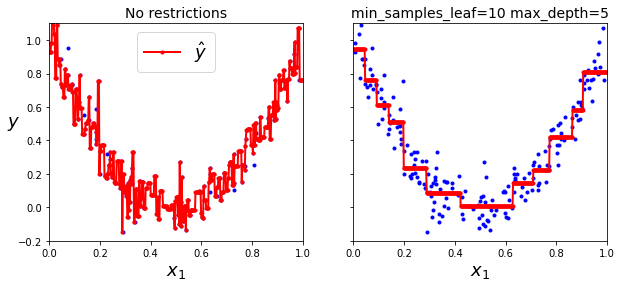

In [8]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10,max_depth=5)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf)+" max_depth={}".format(tree_reg2.max_depth), fontsize=14)

# save_fig("tree_regression_regularization_plot")
plt.show()